In [10]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def import_metrics_json(models_path, run_num):
    """
    Looks in {models_path}/{run_num}/metrics.json and returns the contents as a
    Python dictionary. Returns None if the path does not exist.
    """
    path = os.path.join(models_path, str(run_num), "metrics.json")
    if not os.path.exists(path):
        return None
    with open(path, "r") as f:
        return json.load(f)

In [5]:
def get_best_metric(models_path, metric_extract_func, metric_compare_func):
    """
    Given the path to a set of runs, determines the run with the best metric value,
    where the metric value is fetched by `metric_extract_func`. This function must
    take the imported metrics JSON and return the (scalar) value to use for
    comparison. The best metric value is determiend by `metric_compare_func`, which
    must take in two arguments, and return whether or not the _first_ one is better.
    Returns the number of the run, the value associated with that run, and a list of
    all the values used for comparison.
    """
    # Get the metrics, ignoring empty or nonexistent metrics.json files
    metrics = {run_num : import_metrics_json(models_path, run_num) for run_num in os.listdir(models_path)}
    metrics = {key : val for key, val in metrics.items() if val}  # Remove empties
    
    # Get the best value
    best_run, best_val, all_vals = None, None, []
    for run_num in metrics.keys():
        try:
            val = metric_extract_func(metrics[run_num])
        except Exception:
            print("Warning: Was not able to extract metric for run %s" % run_num)
            continue
        all_vals.append(val)
        if best_val is None or metric_compare_func(val, best_val):
            best_val, best_run = val, run_num
    return best_run, best_val, all_vals

In [2]:
def get_batch_losses(models_path, run_num, batch_loss_key):
    """
    Returns a list of lists, where each list is the batch losses gotten from
    the batch loss key given.
    """
    metrics = import_metrics_json(models_path, run_num)
    return metrics[batch_loss_key]["values"]

In [9]:
models_path = "/users/amtseng/tfmodisco/models/trained_models/SPI1/"
best_run, best_val, all_vals = get_best_metric(
    models_path,
    lambda metrics: metrics["summit_prof_nll"]["values"][0][0],  # First task, arbitrarily
    lambda x, y: x < y
)
print("Best run: %s" % best_run)
print("Associated value: %s" % best_val)

Best run: 7
Associated value: 183.8156736711634


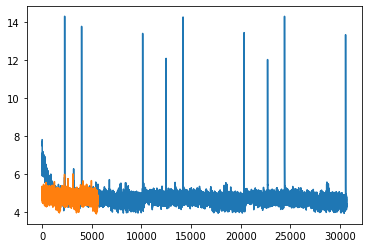

In [14]:
models_path = "/users/amtseng/tfmodisco/models/trained_models/SPI1/"
run_num = 7
train_batch_losses = get_batch_losses(models_path, run_num, "train_batch_losses")
val_batch_losses = get_batch_losses(models_path, run_num, "val_batch_losses")
plt.plot(np.log(np.concatenate(train_batch_losses)))
plt.plot(np.log(np.concatenate(val_batch_losses)))

In [64]:
models_path = "/users/amtseng/tfmodisco/models/trained_models/SPI1_nocounts_nohyperparam/"
run_num = 4
metrics = import_metrics_json(models_path, run_num)
nll = np.array(metrics["summit_prof_nll"]["values"][0])
jsd = np.array(metrics["summit_prof_jsd"]["values"][0])
coords = np.array(metrics["summit_coords"]["values"][0]["values"], dtype=object)
peaks = np.array(metrics["summit_peaks"]["values"][0]["values"])

In [65]:
index = 49661
print(coords[index])
print(peaks[index])
print(nll[index])
print(jsd[index])

['chr1' 196823400 196824400]
[196823765 196824035 196823900]
[ 0.          5.37924933 14.64476706 61.16737063]
[       nan 0.60960088 0.50935003 0.3227287 ]


In [69]:
index = 3
print(coords[index])
print(peaks[index])
print(nll[index])
print(jsd[index])

['chr1' 1001879 1002879]
[1002237 1002521 1002379]
[97.35714615 83.12716849 72.80230842 85.63712561]
[0.26497482 0.44256389 0.27082343 0.44602138]


In [70]:
index = 30
print(coords[index])
print(peaks[index])
print(nll[index])
print(jsd[index])

['chr1' 2290389 2291389]
[2290796 2290996 2290889]
[484.81915036 329.60544184 486.2425754  521.46680809]
[0.26409743 0.26525789 0.21281662 0.1801663 ]


In [76]:
models_path = "/users/amtseng/tfmodisco/models/trained_models/SPI1_nocounts_nohyperparam/"
run_num = 6
metrics = import_metrics_json(models_path, run_num)
# nll = np.array(metrics["summit_prof_nll"]["values"][0])
# jsd = np.array(metrics["summit_prof_jsd"]["values"][0])
coords = np.array(metrics["summit_coords"]["values"][0]["values"], dtype=object)
peaks = np.array(metrics["summit_peaks"]["values"][0]["values"])

In [78]:
index = 777
print(coords[index])
print(peaks[index])
# print(nll[index])
# print(jsd[index])

['chr1' 21123178 21124178]
[21123536 21123820 21123678]
